In [2]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True, precision=6)

In [70]:
# filepath = '../../data/datasets/oct/bn_train_data.h5'
# filepath = '../../data/datasets/ngsim_5_sec_10_feature_timesteps.h5'
filepath = '../../data/datasets/../../data/datasets/ngsim_10_sec_30_feature_timesteps.h5'

f = h5py.File(filepath, 'r')
feature_names = f['risk'].attrs['feature_names']
target_names = f['risk'].attrs['target_names']
features = f['risk/features'].value
targets = f['risk/targets'].value

In [71]:
print(features.shape)

(11427, 30, 177)


In [72]:
feature_names

array(['relative_offset', 'relative_heading', 'velocity', 'length',
       'width', 'lane_curvature', 'markerdist_left', 'markerdist_right',
       'accel', 'jerk', 'turn_rate_global', 'angular_rate_global',
       'turn_rate_frenet', 'angular_rate_frenet', 'timegap',
       'timegap_is_avail', 'time_to_collision',
       'time_to_collision_is_avail', 'is_colliding', 'out_of_lane',
       'negative_velocity', 'lane_offset_left',
       'lane_offset_left_is_avail', 'lane_offset_right',
       'lane_offset_right_is_avail', 'fore_m_dist', 'fore_m_vel',
       'fore_m_accel', 'fore_m_jerk', 'fore_m_length', 'fore_m_width',
       'fore_mrelative_offset', 'fore_mrelative_heading',
       'fore_m_is_avail', 'fore_l_dist', 'fore_l_vel', 'fore_l_accel',
       'fore_l_jerk', 'fore_l_length', 'fore_l_width',
       'fore_lrelative_offset', 'fore_lrelative_heading',
       'fore_l_is_avail', 'fore_r_dist', 'fore_r_vel', 'fore_r_accel',
       'fore_r_jerk', 'fore_r_length', 'fore_r_width',
     

In [73]:
def compute_correlation(x, y):
    assert len(y.shape) == 2
    corr = np.corrcoef(x, y, rowvar=False)
    corr = np.nan_to_num(corr)
    n_y = y.shape[-1]
    # return the correlations between the x variables and the y variables only
    return corr[:-n_y,-n_y:]

In [74]:
def relative_difference(a,b):
    return abs(a-b) / (abs(a) + 1e-8)
def absolute_difference(a,b):
    return abs(a-b)
def absolute_magnitude_increase(a,b):
    return abs(b)-abs(a)

In [90]:
timesteps = features.shape[1]
target_idx = 2
temporal_corr = []
for t in range(timesteps):
    print('{} / {}'.format(t+1, timesteps))
    corr = compute_correlation(features[:,t], targets[:,target_idx,np.newaxis])
    corr /= np.max(np.abs(corr))
    temporal_corr.append(corr)
temporal_corr = np.concatenate(temporal_corr, axis=1).T
print(temporal_corr.shape)

1 / 30
2 / 30
3 / 30
4 / 30


/Users/wulfebw/Programming/miniconda3/envs/riskenv/lib/python3.5/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/wulfebw/Programming/miniconda3/envs/riskenv/lib/python3.5/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


5 / 30
6 / 30
7 / 30
8 / 30
9 / 30
10 / 30
11 / 30
12 / 30
13 / 30
14 / 30
15 / 30
16 / 30
17 / 30
18 / 30
19 / 30
20 / 30
21 / 30
22 / 30
23 / 30
24 / 30
25 / 30
26 / 30
27 / 30
28 / 30
29 / 30
30 / 30
(30, 177)


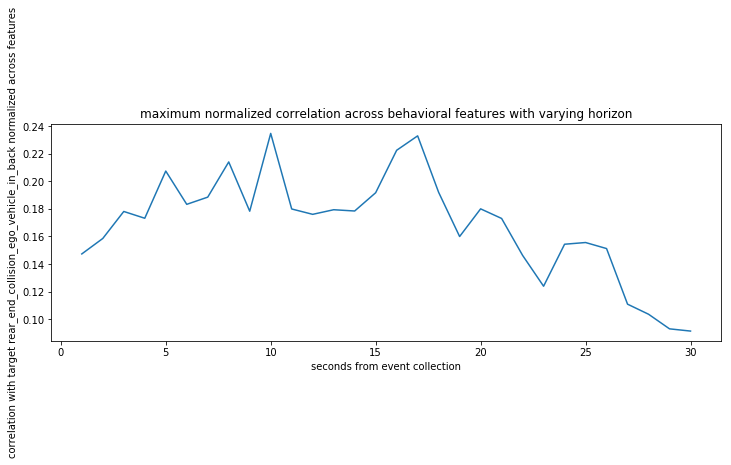

In [91]:
beh_idxs = [i for (i, name) in enumerate(feature_names) if 'beh' in name]
beh_corr = np.max(np.abs(temporal_corr[:,beh_idxs]), axis=-1)
plt.figure(figsize=(12,4))
plt.plot(range(timesteps, 0, -1), beh_corr)
plt.title('maximum normalized correlation across behavioral features with varying horizon')
plt.xlabel('seconds from event collection')
plt.ylabel('correlation with target {} normalized across features'.format(target_names[target_idx]))


In [89]:
idxs = np.argmax(np.abs(temporal_corr), axis=-1)
for t, name in enumerate(reversed(feature_names[idxs])):
    print('{} {}'.format(t+1, name))

1 is_colliding
2 is_colliding
3 is_colliding
4 is_colliding
5 is_colliding
6 is_colliding
7 is_colliding
8 is_colliding
9 is_colliding
10 is_colliding
11 is_colliding
12 is_colliding
13 is_colliding
14 is_colliding
15 fore_fore_fore_m_is_avail
16 is_colliding
17 fore_fore_fore_m_is_avail
18 fore_fore_fore_m_is_avail
19 is_colliding
20 is_colliding
21 is_colliding
22 is_colliding
23 is_colliding
24 is_colliding
25 is_colliding
26 is_colliding
27 is_colliding
28 is_colliding
29 is_colliding
30 is_colliding


In [45]:
print(feature_names[beh_idxs])

['fore_m_beh_lon_a_max' 'fore_m_beh_lon_desired_velocity'
 'fore_m_beh_lon_s_min' 'fore_m_beh_lon_T' 'fore_m_beh_lon_d_cmf'
 'fore_l_beh_lon_a_max' 'fore_l_beh_lon_desired_velocity'
 'fore_l_beh_lon_s_min' 'fore_l_beh_lon_T' 'fore_l_beh_lon_d_cmf'
 'fore_r_beh_lon_a_max' 'fore_r_beh_lon_desired_velocity'
 'fore_r_beh_lon_s_min' 'fore_r_beh_lon_T' 'fore_r_beh_lon_d_cmf'
 'rear_m_beh_lon_a_max' 'rear_m_beh_lon_desired_velocity'
 'rear_m_beh_lon_s_min' 'rear_m_beh_lon_T' 'rear_m_beh_lon_d_cmf'
 'rear_l_beh_lon_a_max' 'rear_l_beh_lon_desired_velocity'
 'rear_l_beh_lon_s_min' 'rear_l_beh_lon_T' 'rear_l_beh_lon_d_cmf'
 'rear_r_beh_lon_a_max' 'rear_r_beh_lon_desired_velocity'
 'rear_r_beh_lon_s_min' 'rear_r_beh_lon_T' 'rear_r_beh_lon_d_cmf'
 'fore_fore_m_beh_lon_a_max' 'fore_fore_m_beh_lon_desired_velocity'
 'fore_fore_m_beh_lon_s_min' 'fore_fore_m_beh_lon_T'
 'fore_fore_m_beh_lon_d_cmf']
